After Cleaned, this dataset has the details of around 4733 cosmetic products
The attributes in this dataset are:

Product_name: The name of the product.
Website: The website it is scraped from. (Ulta, Amazon, Flipkart, or Sephora)
Category: The category of cosmetic product. (eyes, face, lips, body, skincare, or hair)
Subcategory: The sub-category of the product.
Price: The price of the product in MYR.
Brand: The brand of each product.
Ingredients: The ingredients of each product.
Form: The consistency of the product.
Type: Additional information about the product.
Color: The color of product.
Quantity: The volume of product in ml.
Rating: The customer rating of the product. (0 to 5)
Number of ratings: The number of customers who rated that product.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("dataset/cosmetic_clean.csv")
df.head()

,product_name,category,subcategory,brand,ingredients,form,type,color,size,rating_count,product_price,product_ratings
0,Luminous Putty Blush,face,blush,e.l.f. Cosmetics,"Phenyl Trimethicone, Aluminum Starch Octenyls...",cream,"dry,oily,normal",Barbados,0.0,88,32.26,4.0
1,Putty Blush,face,blush,e.l.f. Cosmetics,"Phenyl Trimethicone, Silica,Aluminum Starch O...",cream,"dry,oily,normal",Bali,10.5,"1,498",32.26,4.5
2,Cheek Me Later Cream Vegan Blush,face,blush,florence by mills,"Ethylhexyl Palmitate, Caprylic/Capric Triglyce...",cream,"combination,dry,oily,normal",Stellar Sabrina,5.7,"1,432",64.51,4.6
3,Fluffy Blushy,face,blush,Pacifica,"C9-12 Alkane, Caprylyl Caprylate/Caprate, Dext...",cream,"combination,dry,oily,normal",Sunset,8.4,131,50.69,4.2
4,Supernatural Stick Multi-Use Blush,face,blush,Well People,Helianthus Annuus (Sunflower) Seed /Helianthus...,cream,"combination,dry,oily,normal",Peach,5.1,206,101.38,4.6


In [24]:
df.columns

Index(['product_name', 'category', 'subcategory', 'brand', 'ingredients',
       'form', 'type', 'color', 'size', 'rating_count', 'product_price',
       'product_ratings'],
      dtype='object')

In [25]:
empty_columns = df.isnull().sum()
empty_columns

product_name       0
category           0
subcategory        0
brand              0
ingredients        0
form               0
type               0
color              0
size               0
rating_count       0
product_price      0
product_ratings    0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 3772


In [28]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df[(df['rating'] >= 1.0) & (df['rating'] <= 5.0)]

KeyError: 'rating'

In [ ]:
df.drop(['title-href', 'website', 'country'], axis=1, inplace=True)

In [ ]:
df['price'] = df['price'] / 17.73
df['price'] = df['price'].round(2)

In [ ]:
df.head()

,product_name,category,subcategory,price,brand,ingredients,form,type,color,size,rating,noofratings
17,Deadsea Mud Purifying Mud Soap,body,bodywash,55.30,Ahava,"Pottasium Lauryl Sulfate, Disodium Lauryl Sulf...",cream,all,No color,102,4.7,28
18,Natural Dead Sea Bath Salts,body,bodywash,55.30,Ahava,100% Dead Sea salt,cream,all,No color,255,4.0,1
20,Sea-Kissed Mineral Shower Gel,body,bodywash,110.59,Ahava,"Aqua (Mineral Spring Water), Ammonium Lauryl S...",cream,all,No color,204,4.7,13
21,Mineral Botanic Velvet Cream Wash,body,bodywash,110.59,Ahava,"Aqua (Water), Ammonium Laureth Sulfate, Cocami...",cream,all,No color,510,4.7,301
22,Eucalyptus Bath Salt,body,bodywash,119.81,Ahava,"100% Dead Sea salt, Fragrance",cream,all,No color,960,4.5,39


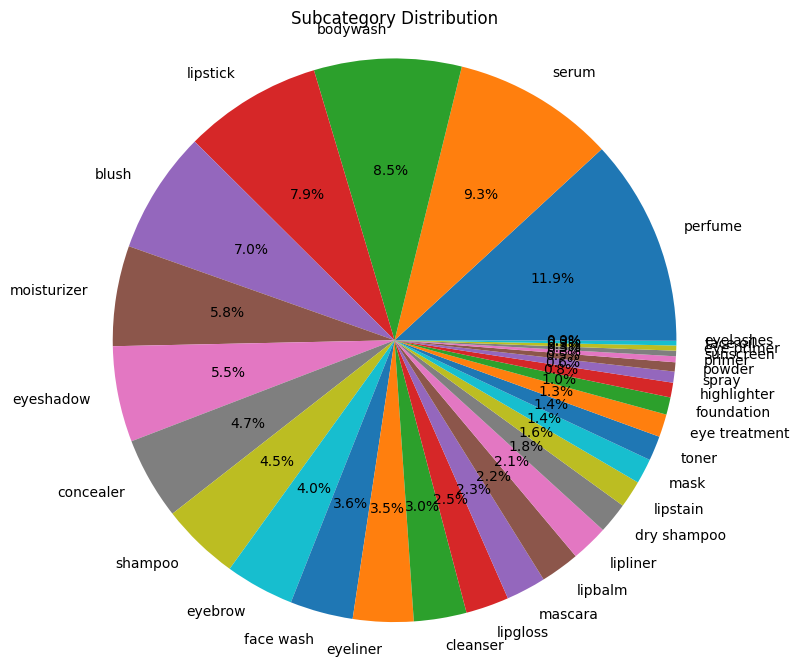

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each subcategory
subcategory_counts = df['subcategory'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%')
plt.title('Subcategory Distribution')
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
df['subcategory'].unique()

array(['bodywash', 'sunscreen', 'moisturizer', 'perfume', 'eyeliner',
       'mascara', 'eye primer', 'eyeshadow', 'eyebrow', 'serum',
       'eyelashes', 'dry shampoo', 'shampoo', 'lipstain', 'lipstick',
       'lipgloss', 'lipbalm', 'lipliner', 'eye treatment', 'mask',
       'cleanser', 'face wash', 'toner', 'spray', 'concealer',
       'foundation', 'blush', 'primer', 'powder', 'highlighter',
       'face oil'], dtype=object)

In [ ]:
df

,product_name,category,subcategory,price,brand,ingredients,form,type,color,size,rating,noofratings
17,Deadsea Mud Purifying Mud Soap,body,bodywash,55.30,Ahava,"Pottasium Lauryl Sulfate, Disodium Lauryl Sulf...",cream,all,No color,102,4.70,28
18,Natural Dead Sea Bath Salts,body,bodywash,55.30,Ahava,100% Dead Sea salt,cream,all,No color,255,4.00,1
20,Sea-Kissed Mineral Shower Gel,body,bodywash,110.59,Ahava,"Aqua (Mineral Spring Water), Ammonium Lauryl S...",cream,all,No color,204,4.70,13
21,Mineral Botanic Velvet Cream Wash,body,bodywash,110.59,Ahava,"Aqua (Water), Ammonium Laureth Sulfate, Cocami...",cream,all,No color,510,4.70,301
22,Eucalyptus Bath Salt,body,bodywash,119.81,Ahava,"100% Dead Sea salt, Fragrance",cream,all,No color,960,4.50,39
...,...,...,...,...,...,...,...,...,...,...,...,...
12610,Bright Future - Smoothing & Brightening Concea...,face,concealer,107.16,MAC Cosmetics,"Water\Aqua\Eau, Glycerin, Butylene Glycol, Toc...",cream,"Combination, Dry, Oily, Normal",Pinklite,100,3.15,14
12611,Bright Future - Smoothing & Brightening Concea...,face,concealer,121.26,MAC Cosmetics,"Water\Aqua\Eau, Cyclopentasiloxane, Dimethicon...",cream,"Combination, Dry, Oily, Normal",No colour,100,3.13,13
12612,Starlaa Rosy Bronze Blush Mini,face,blush,171.46,Klara Cosmetics,"Talc, Ethylhexyl Palmitate, Octyldodecanol, Sy...",powder,"Combination, Oily, Normal, Dry",Selfie Queen,110,4.03,96
12613,Terra Golden Brick Red Blush Travel Size Mini,face,blush,166.38,CLINIQUE,"Water\Aqua\Eau, Dimethicone, Isododecane, Buty...",liquid,"Combination, Dry, Oily, Normal",All,115,3.15,15


In [ ]:
df['rating_count'] = df['noofratings']

In [ ]:
df['product_price'] = df['price']

In [ ]:
df['product_ratings'] = df['rating']

In [ ]:
df.drop(['noofratings', 'price', 'rating'], axis=1, inplace=True)

In [ ]:
df.to_csv('cosmetic_clean.csv', index=False)

In [ ]:
from IPython.display import display

# Display the DataFrame
display(df)


,product_name,category,subcategory,brand,ingredients,form,type,color,size,rating_count,product_price,product_ratings
17,Deadsea Mud Purifying Mud Soap,body,bodywash,Ahava,"Pottasium Lauryl Sulfate, Disodium Lauryl Sulf...",cream,all,No color,102,28,55.30,4.70
18,Natural Dead Sea Bath Salts,body,bodywash,Ahava,100% Dead Sea salt,cream,all,No color,255,1,55.30,4.00
20,Sea-Kissed Mineral Shower Gel,body,bodywash,Ahava,"Aqua (Mineral Spring Water), Ammonium Lauryl S...",cream,all,No color,204,13,110.59,4.70
21,Mineral Botanic Velvet Cream Wash,body,bodywash,Ahava,"Aqua (Water), Ammonium Laureth Sulfate, Cocami...",cream,all,No color,510,301,110.59,4.70
22,Eucalyptus Bath Salt,body,bodywash,Ahava,"100% Dead Sea salt, Fragrance",cream,all,No color,960,39,119.81,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
12610,Bright Future - Smoothing & Brightening Concea...,face,concealer,MAC Cosmetics,"Water\Aqua\Eau, Glycerin, Butylene Glycol, Toc...",cream,"Combination, Dry, Oily, Normal",Pinklite,100,14,107.16,3.15
12611,Bright Future - Smoothing & Brightening Concea...,face,concealer,MAC Cosmetics,"Water\Aqua\Eau, Cyclopentasiloxane, Dimethicon...",cream,"Combination, Dry, Oily, Normal",No colour,100,13,121.26,3.13
12612,Starlaa Rosy Bronze Blush Mini,face,blush,Klara Cosmetics,"Talc, Ethylhexyl Palmitate, Octyldodecanol, Sy...",powder,"Combination, Oily, Normal, Dry",Selfie Queen,110,96,171.46,4.03
12613,Terra Golden Brick Red Blush Travel Size Mini,face,blush,CLINIQUE,"Water\Aqua\Eau, Dimethicone, Isododecane, Buty...",liquid,"Combination, Dry, Oily, Normal",All,115,15,166.38,3.15
